# Multiple Linear Regression: Car Prices Capstone Project

The goal of this project is to create a multiple linear regression model to predict car prices based on their brand, mileage, engine, etc.

## Import libraries

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
plt.style.use("seaborn-whitegrid")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Load & explore data

### Load data

In [2]:
# load car data 
url = "https://raw.githubusercontent.com/lucaskienast/Regression/main/1)%20Linear%20Regression/car_prices.csv"
raw_df = pd.read_csv(url)
raw_df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


### Explore data

In [3]:
# explore car data statistics
raw_df.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


- There are 312 unique car models i.e. would require 312 dummy variables (probably too many for a regression model). Also, other variables like brand, engine, and year can probably describe the model sufficiently.
- Almost all cars have registration as "yes", so variable might not be useful.

## Preprocessing

### Drop obsolete columns

In [4]:
# drop model column
df = raw_df.copy()
df = df.drop(["Model"], axis=1)
df.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Missing values

Rule of thumb: if you are removing less than 5% of observations, you can remove all of them with missing values.

In [5]:
# check missing values
print("MISSING VALUES")
df.isnull().sum()

MISSING VALUES


Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [6]:
# compute percentage of oberservations with missing values
(172 / df.shape[0]) * 100

3.958573072497123

In [7]:
# drop all missing values
df_no_mv = df.copy()
df_no_mv = df_no_mv.dropna(axis=0)
df_no_mv.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


## Outliers

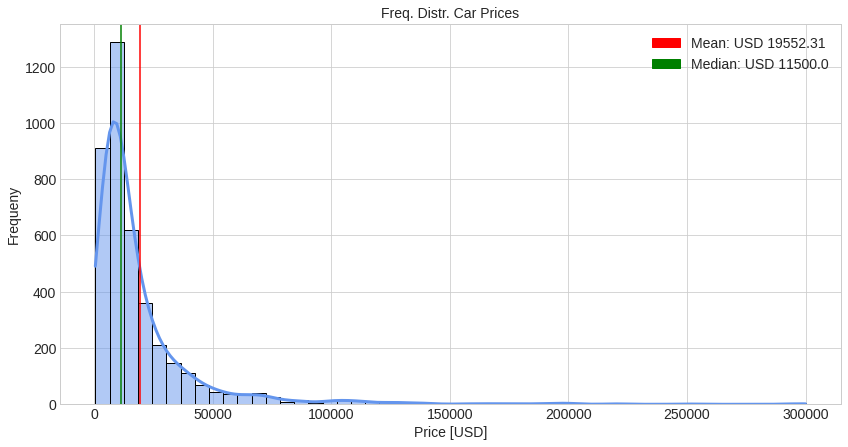

In [8]:
# plot histogram of price data
plt.figure(figsize=(14,7))

sns.histplot(data=df_no_mv, 
             x="Price", 
             kde=True, 
             bins=50,
             color="cornflowerblue",
             line_kws={"linewidth": 3})

mean = df_no_mv["Price"].mean()
median = df_no_mv["Price"].median()
plt.axvline(x=mean, c="r")
plt.axvline(x=median, c="g")
mean_patch = mpatches.Patch(color="r", label="Mean: USD {}".format(np.around(mean,2)))
median_patch = mpatches.Patch(color="g", label="Median: USD {}".format(np.around(median,2)))

plt.legend(handles=[mean_patch, median_patch], fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Price [USD]", fontsize=14)
plt.ylabel("Frequeny", fontsize=14)
plt.title("Freq. Distr. Car Prices", fontsize=14)

plt.show()

- A normally distributed dataset would be optimal.
- However, price is exponentially distributed (needs to be transformed for linear regression).
- Looking at the data statistics table, it can be seen that 75% of cars have a price of USD 21,900.00 or lower. But the maximum is USD 300,000.00 (outliers present). Remove the top 1% of observations with respect to price.

In [9]:
# remove rows of top 1% price observations
price_quantile_99 = df_no_mv["Price"].quantile(0.99)
df_1 = df_no_mv.copy()
df_1 = df_1[df_1["Price"] < price_quantile_99]
df_1.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


There are still similar issues with:
- mileage
- engine volume
- year

So we will check and treat those columns also.

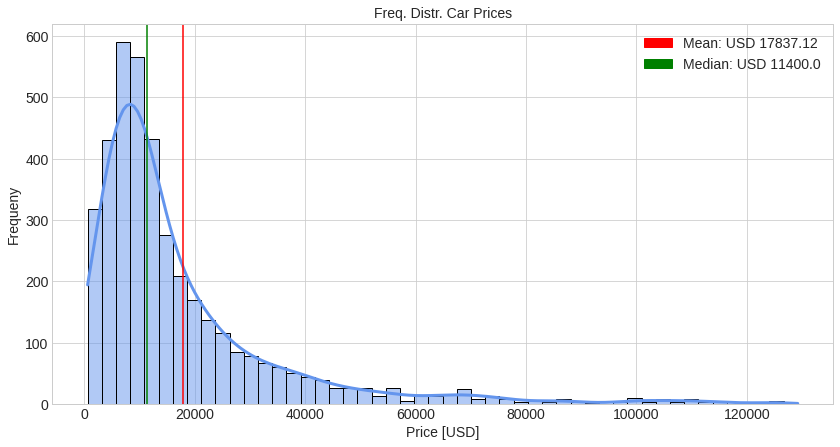

In [10]:
# plot another histogram of price data
plt.figure(figsize=(14,7))

sns.histplot(data=df_1, 
             x="Price", 
             kde=True, 
             bins=50,
             color="cornflowerblue",
             line_kws={"linewidth": 3})

mean = df_1["Price"].mean()
median = df_1["Price"].median()
plt.axvline(x=mean, c="r")
plt.axvline(x=median, c="g")
mean_patch = mpatches.Patch(color="r", label="Mean: USD {}".format(np.around(mean,2)))
median_patch = mpatches.Patch(color="g", label="Median: USD {}".format(np.around(median,2)))

plt.legend(handles=[mean_patch, median_patch], fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Price [USD]", fontsize=14)
plt.ylabel("Frequeny", fontsize=14)
plt.title("Freq. Distr. Car Prices", fontsize=14)

plt.show()

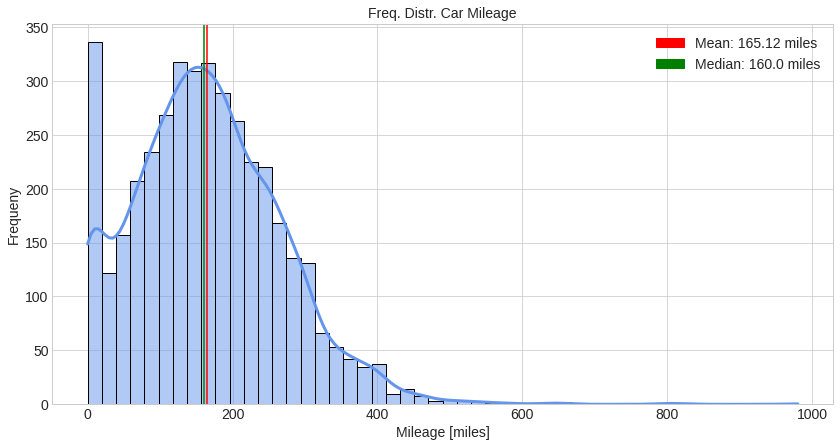

In [11]:
# plot histogram of mileage data
plt.figure(figsize=(14,7))

sns.histplot(data=df_1, 
             x="Mileage", 
             kde=True, 
             bins=50,
             color="cornflowerblue",
             line_kws={"linewidth": 3})

mean = df_1["Mileage"].mean()
median = df_1["Mileage"].median()
plt.axvline(x=mean, c="r")
plt.axvline(x=median, c="g")
mean_patch = mpatches.Patch(color="r", label="Mean: {} miles".format(np.around(mean,2)))
median_patch = mpatches.Patch(color="g", label="Median: {} miles".format(np.around(median,2)))

plt.legend(handles=[mean_patch, median_patch], fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Mileage [miles]", fontsize=14)
plt.ylabel("Frequeny", fontsize=14)
plt.title("Freq. Distr. Car Mileage", fontsize=14)

plt.show()

In [12]:
# remove rows of top 1% mileage observations and rows with 0 mileage (different distribution)
mileage_quantile_99 = df_1["Mileage"].quantile(0.99)
df_2 = df_1.copy()
df_2 = df_2[(df_2["Mileage"] < mileage_quantile_99) & (df_2["Mileage"] > 1)]
df_2.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3709,3709.000000,3709,3709.000000,3709.000000,3709,3709,3709.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,812,NaN,1451,NaN,NaN,1676,3347,NaN
mean,NaN,16119.641785,NaN,171.686708,2.776374,NaN,NaN,2005.977083
std,NaN,15823.014817,NaN,89.766958,5.130688,NaN,NaN,6.357581
min,NaN,600.000000,NaN,2.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6900.000000,NaN,105.000000,1.800000,NaN,NaN,2002.000000
50%,NaN,10999.000000,NaN,165.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,19800.000000,NaN,233.000000,3.000000,NaN,NaN,2011.000000


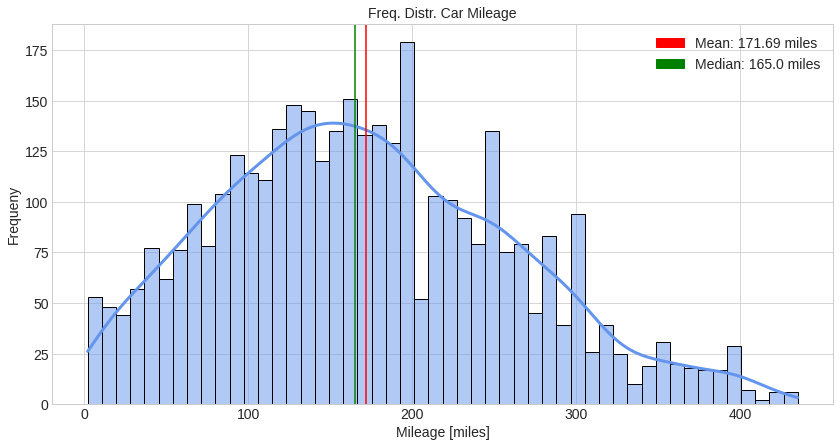

In [13]:
# plot another histogram of mileage data
plt.figure(figsize=(14,7))

sns.histplot(data=df_2, 
             x="Mileage", 
             kde=True, 
             bins=50,
             color="cornflowerblue",
             line_kws={"linewidth": 3})

mean = df_2["Mileage"].mean()
median = df_2["Mileage"].median()
plt.axvline(x=mean, c="r")
plt.axvline(x=median, c="g")
mean_patch = mpatches.Patch(color="r", label="Mean: {} miles".format(np.around(mean,2)))
median_patch = mpatches.Patch(color="g", label="Median: {} miles".format(np.around(median,2)))

plt.legend(handles=[mean_patch, median_patch], fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Mileage [miles]", fontsize=14)
plt.ylabel("Frequeny", fontsize=14)
plt.title("Freq. Distr. Car Mileage", fontsize=14)

plt.show()

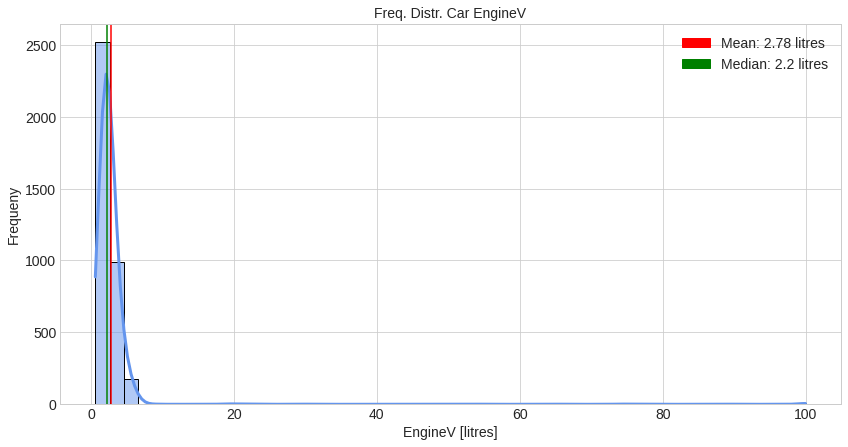

In [14]:
# plot histogram of engine volume data
plt.figure(figsize=(14,7))

sns.histplot(data=df_2, 
             x="EngineV", 
             kde=True, 
             bins=50,
             color="cornflowerblue",
             line_kws={"linewidth": 3})

mean = df_2["EngineV"].mean()
median = df_2["EngineV"].median()
plt.axvline(x=mean, c="r")
plt.axvline(x=median, c="g")
mean_patch = mpatches.Patch(color="r", label="Mean: {} litres".format(np.around(mean,2)))
median_patch = mpatches.Patch(color="g", label="Median: {} litres".format(np.around(median,2)))

plt.legend(handles=[mean_patch, median_patch], fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("EngineV [litres]", fontsize=14)
plt.ylabel("Frequeny", fontsize=14)
plt.title("Freq. Distr. Car EngineV", fontsize=14)

plt.show()

In [15]:
# remove rows with engine volume of more than 6.5 litres
df_3 = df_2.copy()
df_3 = df_3[df_3["EngineV"] < 6.5]
df_3.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3686,3686.000000,3686,3686.000000,3686.000000,3686,3686,3686.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,807,NaN,1439,NaN,NaN,1669,3330,NaN
mean,NaN,16166.338953,NaN,171.533098,2.453049,NaN,NaN,2005.991590
std,NaN,15849.925869,NaN,89.794566,0.954990,NaN,NaN,6.356969
min,NaN,600.000000,NaN,2.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6950.000000,NaN,105.000000,1.800000,NaN,NaN,2002.000000
50%,NaN,10999.000000,NaN,164.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,19800.000000,NaN,232.000000,3.000000,NaN,NaN,2011.000000


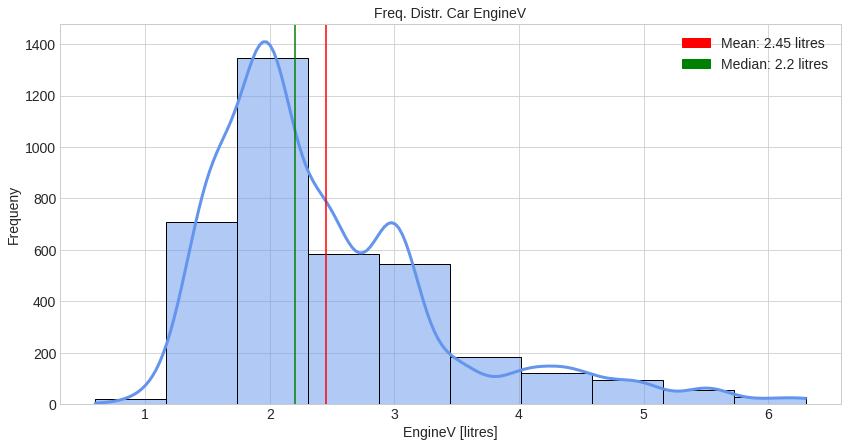

In [16]:
# plot another histogram of engine volume data
plt.figure(figsize=(14,7))

sns.histplot(data=df_3, 
             x="EngineV", 
             kde=True, 
             bins=10,
             color="cornflowerblue",
             line_kws={"linewidth": 3})

mean = df_3["EngineV"].mean()
median = df_3["EngineV"].median()
plt.axvline(x=mean, c="r")
plt.axvline(x=median, c="g")
mean_patch = mpatches.Patch(color="r", label="Mean: {} litres".format(np.around(mean,2)))
median_patch = mpatches.Patch(color="g", label="Median: {} litres".format(np.around(median,2)))

plt.legend(handles=[mean_patch, median_patch], fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("EngineV [litres]", fontsize=14)
plt.ylabel("Frequeny", fontsize=14)
plt.title("Freq. Distr. Car EngineV", fontsize=14)

plt.show()

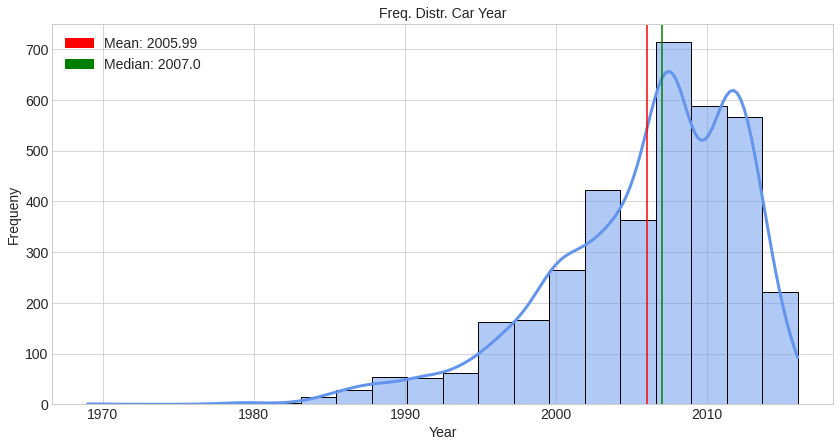

In [17]:
# plot histogram of year data
plt.figure(figsize=(14,7))

sns.histplot(data=df_3, 
             x="Year", 
             kde=True, 
             bins=20,
             color="cornflowerblue",
             line_kws={"linewidth": 3})

mean = df_3["Year"].mean()
median = df_3["Year"].median()
plt.axvline(x=mean, c="r")
plt.axvline(x=median, c="g")
mean_patch = mpatches.Patch(color="r", label="Mean: {}".format(np.around(mean,2)))
median_patch = mpatches.Patch(color="g", label="Median: {}".format(np.around(median,2)))

plt.legend(handles=[mean_patch, median_patch], fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Frequeny", fontsize=14)
plt.title("Freq. Distr. Car Year", fontsize=14)

plt.show()

In [18]:
# remove rows of all cars built before 2000
df_4 = df_3.copy()
df_4 = df_4[df_4["Year"] > 2000]
df_4.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3005,3005.000000,3005,3005.000000,3005.000000,3005,3005,3005.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,667,NaN,1043,NaN,NaN,1432,2812,NaN
mean,NaN,18730.279927,NaN,150.227621,2.478220,NaN,NaN,2008.361398
std,NaN,16435.308935,NaN,75.427848,0.998146,NaN,NaN,3.796659
min,NaN,1700.000000,NaN,2.000000,0.650000,NaN,NaN,2001.000000
25%,NaN,8900.000000,NaN,95.000000,1.800000,NaN,NaN,2006.000000
50%,NaN,12999.000000,NaN,148.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,22700.000000,NaN,200.000000,3.000000,NaN,NaN,2012.000000


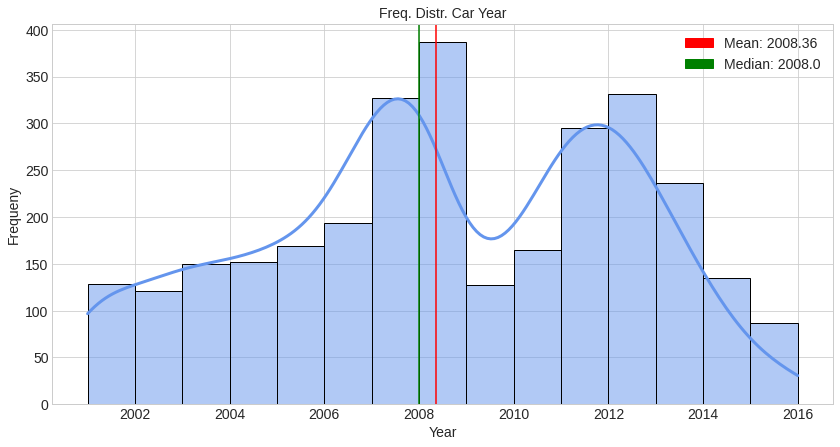

In [19]:
# plot another histogram of year data
plt.figure(figsize=(14,7))

sns.histplot(data=df_4, 
             x="Year", 
             kde=True, 
             bins=15,
             color="cornflowerblue",
             line_kws={"linewidth": 3})

mean = df_4["Year"].mean()
median = df_4["Year"].median()
plt.axvline(x=mean, c="r")
plt.axvline(x=median, c="g")
mean_patch = mpatches.Patch(color="r", label="Mean: {}".format(np.around(mean,2)))
median_patch = mpatches.Patch(color="g", label="Median: {}".format(np.around(median,2)))

plt.legend(handles=[mean_patch, median_patch], fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Frequeny", fontsize=14)
plt.title("Freq. Distr. Car Year", fontsize=14)

plt.show()

In [20]:
# store cleaned data in new df
df_cleaned = df_4.copy()
df_cleaned = df_cleaned.reset_index(drop=True)

## Check OLS Assumptions

### Linear relationship

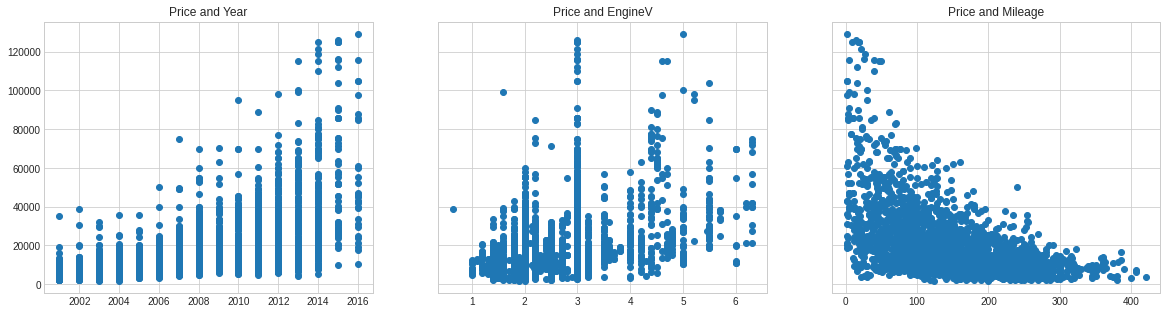

In [21]:
# plot price against year, engine volume, and mileage
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize =(20,5)) #sharey -> share 'Price' as y

axes[0].scatter(df_cleaned['Year'],df_cleaned['Price'])
axes[0].set_title('Price and Year')

axes[1].scatter(df_cleaned['EngineV'],df_cleaned['Price'])
axes[1].set_title('Price and EngineV')

axes[2].scatter(df_cleaned['Mileage'],df_cleaned['Price'])
axes[2].set_title('Price and Mileage')

plt.show()

We can spot some patterns, but not really any linear ones. It looks like

- price ~ exp(year)
- price ~ 1/mileage
- price-engineV relationship not as clear


Price is not normally distributed, so its relationship with the other (rather or more normally distributed) features is not linear.

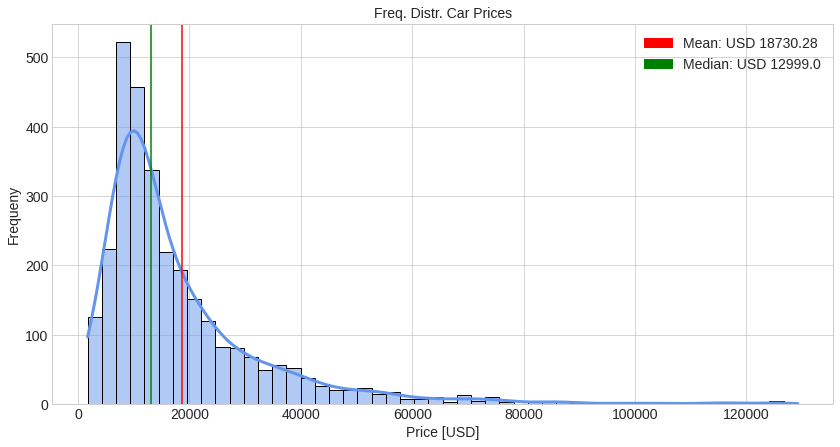

In [22]:
# plot histogram of cleaned price data
plt.figure(figsize=(14,7))

sns.histplot(data=df_cleaned, 
             x="Price", 
             kde=True, 
             bins=50,
             color="cornflowerblue",
             line_kws={"linewidth": 3})

mean = df_cleaned["Price"].mean()
median = df_cleaned["Price"].median()
plt.axvline(x=mean, c="r")
plt.axvline(x=median, c="g")
mean_patch = mpatches.Patch(color="r", label="Mean: USD {}".format(np.around(mean,2)))
median_patch = mpatches.Patch(color="g", label="Median: USD {}".format(np.around(median,2)))

plt.legend(handles=[mean_patch, median_patch], fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Price [USD]", fontsize=14)
plt.ylabel("Frequeny", fontsize=14)
plt.title("Freq. Distr. Car Prices", fontsize=14)

plt.show()

In [23]:
# create log of price
log_price = np.log(df_cleaned["Price"])
df_cleaned["log_price"] = log_price
df_cleaned = df_cleaned.drop("Price", axis=1)
df_cleaned.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
1,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
2,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
3,Audi,vagon,200,2.7,Diesel,yes,2006,9.560997
4,Renault,vagon,193,1.5,Diesel,yes,2012,9.287209


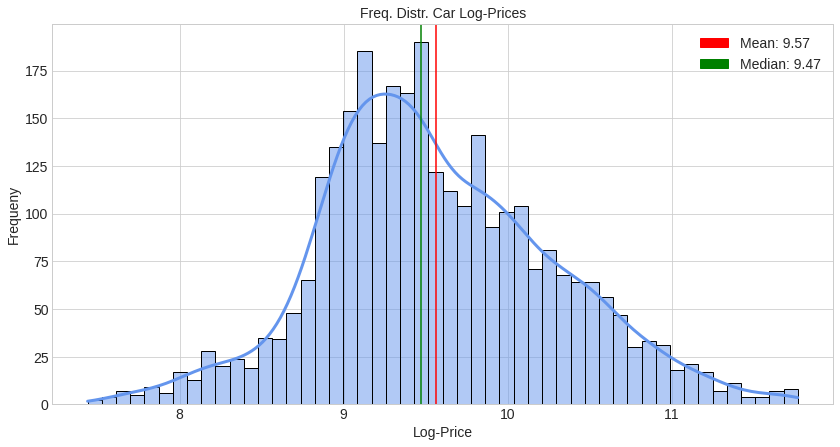

In [24]:
# plot histogram of log cleaned price data
plt.figure(figsize=(14,7))

sns.histplot(data=df_cleaned, 
             x="log_price", 
             kde=True, 
             bins=50,
             color="cornflowerblue",
             line_kws={"linewidth": 3})

mean = df_cleaned["log_price"].mean()
median = df_cleaned["log_price"].median()
plt.axvline(x=mean, c="r")
plt.axvline(x=median, c="g")
mean_patch = mpatches.Patch(color="r", label="Mean: {}".format(np.around(mean,2)))
median_patch = mpatches.Patch(color="g", label="Median: {}".format(np.around(median,2)))

plt.legend(handles=[mean_patch, median_patch], fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Log-Price", fontsize=14)
plt.ylabel("Frequeny", fontsize=14)
plt.title("Freq. Distr. Car Log-Prices", fontsize=14)

plt.show()

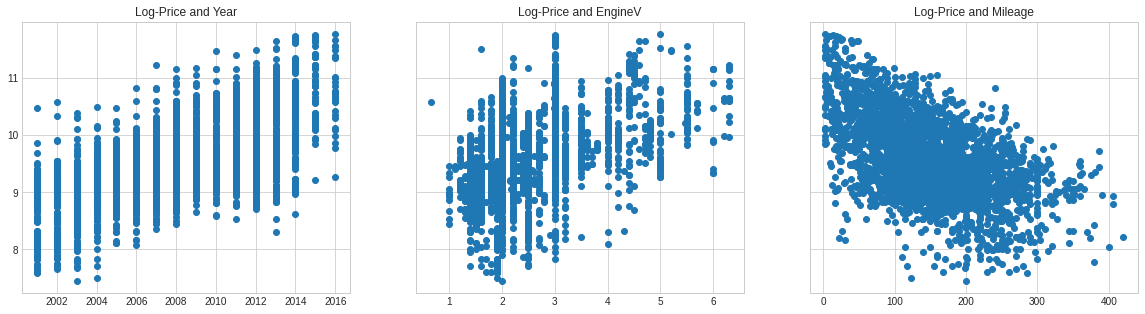

In [25]:
# plot log-price against year, engine volume, and mileage
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize =(20,5)) #sharey -> share 'Price' as y

axes[0].scatter(df_cleaned['Year'],df_cleaned['log_price'])
axes[0].set_title('Log-Price and Year')

axes[1].scatter(df_cleaned['EngineV'],df_cleaned['log_price'])
axes[1].set_title('Log-Price and EngineV')

axes[2].scatter(df_cleaned['Mileage'],df_cleaned['log_price'])
axes[2].set_title('Log-Price and Mileage')

plt.show()

After having transformed prices to log-prices, the relationships with year, engine volume, and mileage appear much more linear.

### Homoscedasticity

The variance of year, engine volume, and mileage does not appear to change by a lot as log-price changes.

### No autocorrelation

Since the data is not time series data, there is no autocorrelation.

### No multicollinearity

There may be multicollinearity between year and mileage, since they are closely related in real life.

In [26]:
# check for multicollinearity amongst features with Variance-Inflation-Factor
variables = df_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,4.942078,Mileage
1,11.175279,Year
2,7.159780,EngineV


A VIF of higher than 5 or 10 indicates that there is a problem with the independent variables in your model. Hence, remove the year column and check the ones left over again.

In [27]:
# check for multicollinearity amongst features (without year) with Variance-Inflation-Factor
variables = df_cleaned[['Mileage','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,3.166116,Mileage
1,3.166116,EngineV


In [28]:
# remove year column from cleaned dataframe
df_no_multicol = df_cleaned.copy()
df_no_multicol = df_no_multicol.drop(["Year"], axis=1)
df_no_multicol.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
1,Audi,crossover,240,4.2,Petrol,yes,10.043249
2,Toyota,crossover,120,2.0,Petrol,yes,9.814656
3,Audi,vagon,200,2.7,Diesel,yes,9.560997
4,Renault,vagon,193,1.5,Diesel,yes,9.287209


## Dummy variables

If we have n categories for a categorical feature, we have to create n-1 dummies in order to avoid multicollinearity as the left out category is perfectly explained by the aggregate of the n-1 dummies.

In [29]:
# create dummy features and drop one of n dummies
df_with_dummies = pd.get_dummies(df_no_multicol, drop_first=True)
df_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
1,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
3,200,2.7,9.560997,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,193,1.5,9.287209,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1


In [30]:
# check VIF of all features
variables = df_with_dummies[[column for column in df_with_dummies.columns if column not in  ["log_price"]]]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,5.608646,Mileage
1,8.534325,EngineV
2,2.234606,Brand_BMW
3,2.970763,Brand_Mercedes-Benz
4,1.814945,Brand_Mitsubishi
5,2.406031,Brand_Renault
6,2.446179,Brand_Toyota
7,3.111315,Brand_Volkswagen
8,1.461659,Body_hatch
9,1.551955,Body_other


Registration has a very high VIF, so drop this column and check again.

In [31]:
# check VIF of all features except registration
variables = df_with_dummies[[column for column in df_with_dummies.columns if column not in  ["log_price", "Registration_yes"]]]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,5.606394,Mileage
1,6.741798,EngineV
2,2.087748,Brand_BMW
3,2.767414,Brand_Mercedes-Benz
4,1.567480,Brand_Mitsubishi
5,2.024598,Brand_Renault
6,2.135450,Brand_Toyota
7,2.588684,Brand_Volkswagen
8,1.408223,Body_hatch
9,1.493338,Body_other


In [32]:
# drop registration dummy column
df_with_dummies = df_with_dummies.drop(["Registration_yes"], axis=1)
df_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
0,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0
1,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,200,2.7,9.560997,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,193,1.5,9.287209,0,0,0,1,0,0,0,0,0,1,0,0,0,0


## Rearrange columns

In [33]:
# get column names
df_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol'], dtype=object)

In [34]:
# define new order of columns
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol']

In [35]:
# create df of preprocessed data
df_preprocessed = df_with_dummies[cols]
df_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
0,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
1,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,9.560997,200,2.7,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,9.287209,193,1.5,0,0,0,1,0,0,0,0,0,1,0,0,0,0


## Declare features and targets

In [36]:
# create features and targets 
y = df_preprocessed["log_price"].values
X_conti = df_preprocessed[["Mileage", "EngineV"]].values
X_dummy = df_preprocessed.drop(["log_price", "Mileage", "EngineV"], axis=1).values

## Normalize continuous features

In [37]:
# use Normalizer to normalize mileage and engine volume
scaler = StandardScaler()
scaler.fit(X_conti)
X_conti_norm = scaler.transform(X_conti)

## Column-stack dummy and normalized features

In [38]:
# use numpy to connect dummy and continuous features
X = np.column_stack((X_conti_norm, X_dummy))

## Train-Test Split

In [39]:
# 80:20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train multiple linear regression model

In [40]:
# create model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Test model

In [41]:
# make predictions
yhat = regressor.predict(X_train)

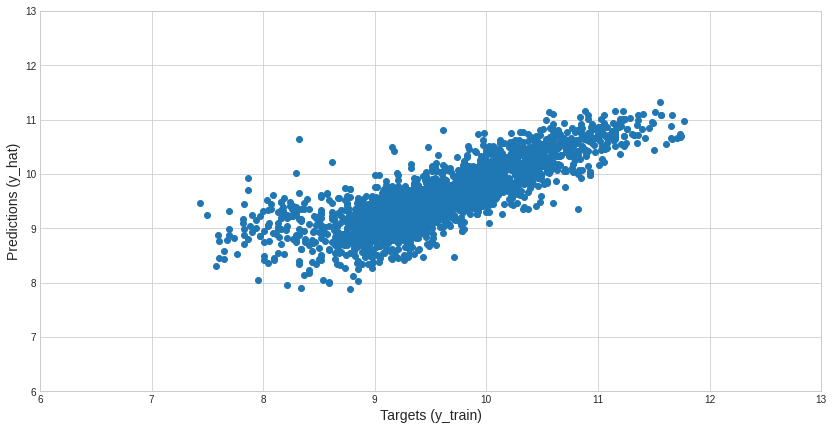

In [42]:
# plot predictions against actuals
plt.figure(figsize=(14,7))
plt.scatter(y_train, yhat)
plt.xlabel('Targets (y_train)',size=14)
plt.ylabel('Predictions (y_hat)',size=14)
plt.xlim(6, 13)
plt.ylim(6, 13)
plt.show()

The model seems to have problems predicting the prices of cheaper cars. In those cases, the model tends to overestimate the targets.

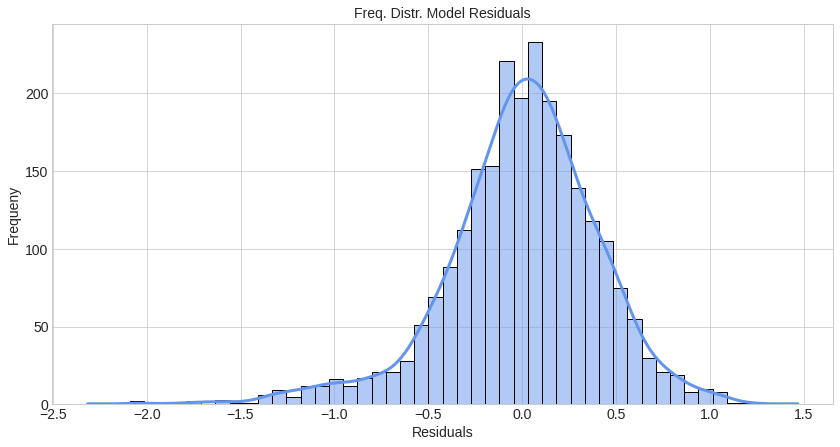

In [43]:
# check normality of residuals with histogram
plt.figure(figsize=(14,7))

sns.histplot((y_train - yhat), 
             kde=True, 
             bins=50,
             color="cornflowerblue",
             line_kws={"linewidth": 3})

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Residuals", fontsize=14)
plt.ylabel("Frequeny", fontsize=14)
plt.title("Freq. Distr. Model Residuals", fontsize=14)

plt.show()

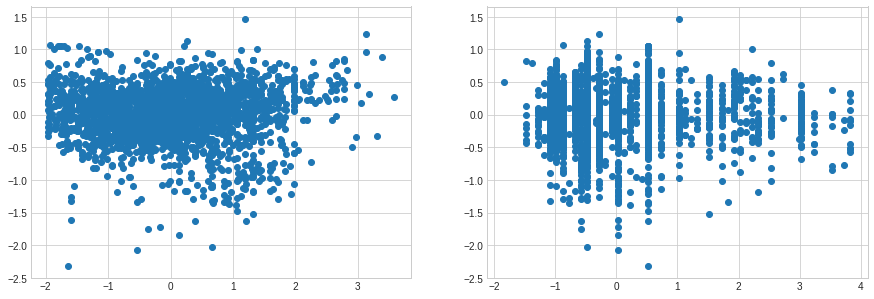

In [44]:
# scatter plot to check endogeneity
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
axes[0].scatter(X_train[:,0], (y_train - yhat), label="Mileage")
axes[1].scatter(X_train[:,1], (y_train - yhat), label="EngineV")
plt.show()

There does not appear to be any correlation between the features and the error.

In [45]:
# calculate R2 & Adjusted R2
R2 = regressor.score(X_train,y_train)
print("R2: {:.2f}".format(R2))

adj_R2 = 1- (1-R2) * (X_train.shape[0] - 1) / (X_train.shape[0] - X_train.shape[1] - 1)
print("Adj-R2: {:.2f}".format(adj_R2))

R2: 0.68
Adj-R2: 0.67


In [46]:
# weights and bias summary table
reg_summary = pd.DataFrame(df_preprocessed.drop(["log_price"], axis=1).columns.values, columns=['Features'])
reg_summary['Weights'] = regressor.coef_
reg_summary

,Features,Weights
0,Mileage,-0.414415
1,EngineV,0.209968
2,Brand_BMW,0.091426
3,Brand_Mercedes-Benz,0.089494
4,Brand_Mitsubishi,-0.520064
5,Brand_Renault,-0.525618
6,Brand_Toyota,-0.164715
7,Brand_Volkswagen,-0.144200
8,Body_hatch,-0.544906
9,Body_other,-0.257773


Positive weights indicate that as the underlying feature increases in value, so do the log-price and price.

- Higher mileage has a negative effect on price
- Higher enginve volume has a positive effect on price

The dummy variables have to be considered with respect to the omitted dummy (n-1):

- only Mercedes and BMW have a positive effect on price compared to the baseline assumption that it is an Audi
- all other brands have a negative effect on price in comparison to it being an Audi
- all body types have negative effects on price relative to the body type being a crossover
- same goes for all engine types with respect to diesel engines

## Test model

In [47]:
# make predictions
yhat_test = regressor.predict(X_test)

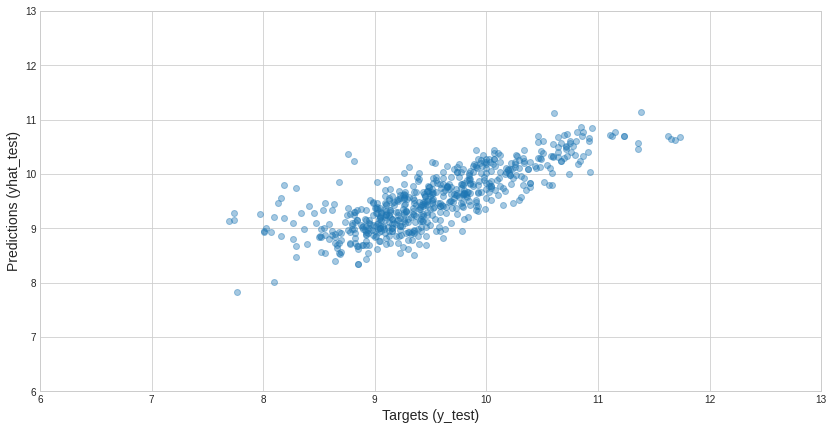

In [48]:
# plot predictions against actuals
plt.figure(figsize=(14,7))
plt.scatter(y_test, yhat_test, alpha=0.4)
plt.xlabel('Targets (y_test)',size=14)
plt.ylabel('Predictions (yhat_test)',size=14)
plt.xlim(6, 13)
plt.ylim(6, 13)
plt.show()

In [49]:
# evaluate model with summary table (apply exponential to revert logging)
eval_df = pd.DataFrame({"Actuals": np.exp(y_test), "Predictions": np.exp(yhat_test), "%-Error": np.abs(((np.exp(yhat_test)-np.exp(y_test))/np.exp(y_test))*100)})
eval_df

,Actuals,Predictions,%-Error
0,10500.0,18168.997595,73.038072
1,11200.0,9902.098205,11.588409
2,28900.0,30479.155465,5.464206
3,23700.0,16251.599863,31.427849
4,11400.0,17613.704640,54.506181
...,...,...,...
596,4400.0,6014.917305,36.702666
597,34000.0,25478.522123,25.063170
598,45500.0,30794.707375,32.319324
599,11900.0,19334.378624,62.473770


In [50]:
# compute mean percentage error
eval_df.loc[:, "%-Error"].mean()

34.261476431109216

In [51]:
eval_df.describe()

,Actuals,Predictions,%-Error
count,601.000000,601.000000,601.000000
mean,17740.207205,16224.332813,34.261476
std,15428.550951,9935.649270,47.874382
min,2200.000000,2506.970449,0.017099
25%,8700.000000,9007.994443,11.987795
50%,12800.000000,13100.266728,23.040789
75%,21000.000000,20452.404614,38.613914
max,125000.000000,69167.714908,401.754302
